In [1]:
import numpy as np
import wrf
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
from netCDF4 import Dataset
import xarray as xr
from wrf import to_np, getvar, CoordPair, vertcross

In [9]:
date='21'
hour='18'

file0_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
file1_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
file2_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gombasin_cool_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

In [10]:
ncfile0 = Dataset(file0_wrf_d02)
ncfile1 = Dataset(file1_wrf_d02)
ncfile2 = Dataset(file2_wrf_d02)

xrfile0 = xr.open_dataset(file0_wrf_d02)
xrfile1 = xr.open_dataset(file1_wrf_d02)
xrfile2 = xr.open_dataset(file2_wrf_d02)

In [11]:
t0 = wrf.tk((xrfile0['P']+xrfile0['PB']),xrfile0['T']+300)
t1 = wrf.tk((xrfile1['P']+xrfile1['PB']),xrfile1['T']+300)
t2 = wrf.tk((xrfile2['P']+xrfile2['PB']),xrfile2['T']+300)

In [12]:
z0 = getvar(ncfile0, "z")
dbz0 = getvar(ncfile0, "dbz")
Z0 = 10**(dbz0/10.)

z1 = getvar(ncfile1, "z")
dbz1 = getvar(ncfile1, "dbz")
Z1 = 10**(dbz1/10.)

z2 = getvar(ncfile2, "z")
dbz2 = getvar(ncfile2, "dbz")
Z2 = 10**(dbz2/10.)

In [13]:
# Create the start point and end point for the cross section
#start_points = [CoordPair(lat=33., lon=-85.)]
start_points = [CoordPair(lat=31.85, lon=-85.3)]
end_points = [CoordPair(lat=30., lon=-81.89)]

In [14]:
# Compute the vertical cross-section interpolation.  Also, include the
# lat/lon points along the cross-section.

t_cross0=[]
t_cross1=[]
t_cross2=[]
dbz_cross0=[]
dbz_cross1=[]
dbz_cross2=[]

for i, (start_point, end_point) in enumerate(zip(start_points, end_points)):
    
    print(i)

    t_cross0.append(vertcross(t0[0,:,:,:], z0, wrfin=ncfile0, start_point=start_point,
                              end_point=end_point, latlon=True, meta=True))

    t_cross1.append(vertcross(t1[0,:,:,:], z1, wrfin=ncfile1, start_point=start_point,
                              end_point=end_point, latlon=True, meta=True))

    t_cross2.append(vertcross(t2[0,:,:,:], z2, wrfin=ncfile2, start_point=start_point,
                              end_point=end_point, latlon=True, meta=True))


    z_cross0 = vertcross(Z0, z0, wrfin=ncfile0, start_point=start_point,
                         end_point=end_point, latlon=True, meta=True)

    z_cross1 = vertcross(Z1, z1, wrfin=ncfile1, start_point=start_point,
                         end_point=end_point, latlon=True, meta=True)

    z_cross2 = vertcross(Z2, z2, wrfin=ncfile2, start_point=start_point,
                         end_point=end_point, latlon=True, meta=True)

    dbz_cross0.append(10.0 * np.log10(z_cross0))
    dbz_cross1.append(10.0 * np.log10(z_cross1))
    dbz_cross2.append(10.0 * np.log10(z_cross2))

0


/glade/work/molina/miniconda3/envs/python-tutorial/lib/python3.7/site-packages/wrf/metadecorators.py:1092: UserWarning: 'latlon' is set to True, but 'field3d' contains no coordinate information
  warnings.warn("'latlon' is set to True, but 'field3d' "


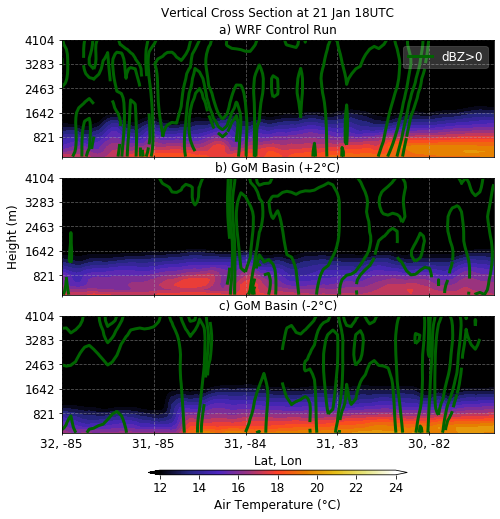

In [15]:
###############################################################################
###############################################################################
###############################################################################


fig = plt.figure(figsize=(6.,6.5))

plt.suptitle("Vertical Cross Section at 21 Jan 18UTC", x=0.5, y=1.0, fontsize=12)


###############################################################################


ax1 = fig.add_axes([0., 0.68, 1., 0.25])
ax2 = fig.add_axes([0., 0.385, 1., 0.25])
ax3 = fig.add_axes([0., 0.09, 1., 0.25])

a = u"\u00b0"


###############################################################################


wspd_contours = ax1.contourf((t_cross0[0]-273.15), levels=150, vmin=12, vmax=24, cmap=get_cmap("CMRmap"))
wspd_contours1 = ax1.contour(np.ma.masked_where(dbz_cross0[0]<0, dbz_cross0[0]),  levels=4,
                             vmin=20, vmax=80, colors='darkgreen', linewidths=3., linestyles='-')

coord_pairs = to_np(z_cross0[0].coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = np.array([pair.latlon_str(fmt="{:.0f}, {:.0f}")
                    for pair in to_np(coord_pairs)])
ax1.set_xticks(x_ticks[::20])
ax1.set_xticklabels(x_labels[::20], rotation=25, fontsize=12)

vert_vals = to_np(t_cross1[0].coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax1.set_ylim([1,25])
ax1.set_yticks(v_ticks[5:26:5])
ax1.set_yticklabels(np.round(vert_vals[5:26:5],0).astype(int), fontsize=12)
ax1.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)

#ax1.set_xlabel("Lat, Lon", fontsize=12)
#ax1.set_ylabel("Height (m)", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.set_title("a) WRF Control Run", fontsize=12)


###############################################################################


wspd_contours = ax2.contourf((t_cross1[0]-273.15), levels=150, vmin=12, vmax=24, cmap=get_cmap("CMRmap"))
wspd_contours1 = ax2.contour(np.ma.masked_where(dbz_cross1[0]<0, dbz_cross1[0]), levels=4,
                             vmin=20, vmax=80, colors='darkgreen', linewidths=3., linestyles='-')

coord_pairs = to_np(z_cross0[0].coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = np.array([pair.latlon_str(fmt="{:.0f}, {:.0f}")
                    for pair in to_np(coord_pairs)])
ax2.set_xticks(x_ticks[::20])
ax2.set_xticklabels(x_labels[::20], rotation=25, fontsize=12)
ax2.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)

vert_vals = to_np(t_cross1[0].coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax2.set_ylim([1,25])
ax2.set_yticks(v_ticks[5:26:5])
ax2.set_yticklabels(np.round(vert_vals[5:26:5],0).astype(int), fontsize=12)

#ax2.set_xlabel("Lat, Lon", fontsize=12)
ax2.set_ylabel("Height (m)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

ax2.set_title("b) GoM Basin (+2"+a+"C)", fontsize=12)


###############################################################################


wspd_contours = ax3.contourf((t_cross2[0]-273.15), levels=150, vmin=12, vmax=24, cmap=get_cmap("CMRmap"))
wspd_contours1 = ax3.contour(np.ma.masked_where(dbz_cross2[0]<0, dbz_cross2[0]),  levels=4,
                             vmin=20, vmax=80, colors='darkgreen', linewidths=3., linestyles='-')

coord_pairs = to_np(z_cross0[0].coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = np.array([pair.latlon_str(fmt="{:.0f}, {:.0f}")
                    for pair in to_np(coord_pairs)])
ax3.set_xticks(x_ticks[::20])
ax3.set_xticklabels(x_labels[::20], fontsize=12)
ax3.tick_params(axis='x',direction='inout',bottom=True,labelbottom=True)

vert_vals = to_np(t_cross1[0].coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax3.set_ylim([1,25])
ax3.set_yticks(v_ticks[5:26:5])
ax3.set_yticklabels(np.round(vert_vals[5:26:5],0).astype(int), fontsize=12)

ax3.set_xlabel("Lat, Lon", fontsize=12)
#ax3.set_ylabel("Height (m)", fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.set_title("c) GoM Basin (-2"+a+"C)", fontsize=12)


###############################################################################



#cb = plt.cm.ScalarMappable(cmap="CMRmap")
#cb.set_array(t_cross2[0]-273.15)
#cb.set_clim(10., 20.)
#plt.colorbar(cb, boundaries=[10,11,12,13,14,15,16,17,18,19,20])


import matplotlib as mpl

cbar_ax = fig.add_axes([0.2, 0., 0.6, 0.01])


norm = mpl.colors.Normalize(vmin=12, vmax=24)

cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=mpl.cm.CMRmap,
                                norm=norm,
                                orientation='horizontal',
                                extend='both',
                                ticks=np.array([10,12,14,16,18,20,22,24]))

cb1.set_label('Air Temperature ('+a+'C)', fontsize=12)

from matplotlib.lines import Line2D
custom_line = [Line2D([0], [0], color="darkgreen", linestyle='-', linewidth=3.)]


cb1.ax.tick_params(labelsize=12)
legend = ax1.legend([custom_line[0]],
                       [u"dBZ>0"],
                       loc="upper right", framealpha=0.2,
                       fancybox=True, fontsize=12)
plt.setp(legend.get_texts(), color='w')


###############################################################################


#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig14.png', bbox_inches='tight', dpi=1200)
plt.show()
plt.close()


###############################################################################
###############################################################################
###############################################################################

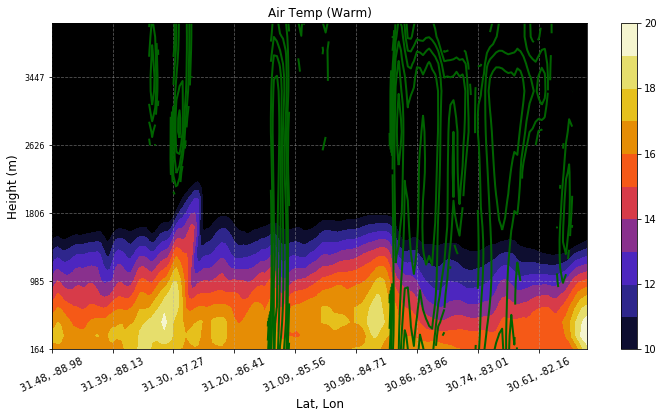

In [308]:
# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf((t_cross1[0]-273.15), levels=150, vmin=12, vmax=20, cmap=get_cmap("CMRmap"))
wspd_contours1 = ax.contour(np.ma.masked_where(dbz_cross1[0]<20, dbz_cross1[0]), 
                            vmin=20, vmax=80, colors='darkgreen', linewidths=2., linestyles='-')

ax.set_ylim([1,25])

# Add the color bar
cb = plt.cm.ScalarMappable(cmap="CMRmap")
cb.set_array(t_cross2[0]-273.15)
cb.set_clim(10., 20.)
plt.colorbar(cb, boundaries=[10,11,12,13,14,15,16,17,18,19,20])


# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(z_cross0[0].coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = np.array([pair.latlon_str(fmt="{:.2f}, {:.2f}")
                    for pair in to_np(coord_pairs)])
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=25, fontsize=10)

#Set the y-ticks to be height.
vert_vals = to_np(t_cross1[0].coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[1:25:5])
ax.set_yticklabels(np.round(vert_vals[1:25:5],0).astype(int), fontsize=8)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Lat, Lon", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

ax.grid(True, linestyle='--', alpha=0.5)

plt.title("Air Temp (Warm)")

plt.show()

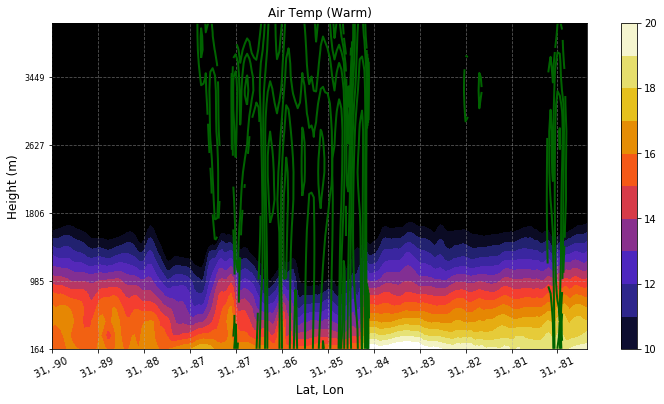

In [199]:
# Create the figure
fig = plt.figure(figsize=(12,6))
ax = plt.axes()

# Make the contour plot
wspd_contours = ax.contourf((t_cross2[0]-273.15), levels=150, vmin=12, vmax=20, cmap=get_cmap("CMRmap"))
wspd_contours1 = ax.contour(np.ma.masked_where(dbz_cross2[0]<20, dbz_cross2[0]), 
                            vmin=20, vmax=80, colors='darkgreen', linewidths=2., linestyles='-')

ax.set_ylim([1,25])

# Add the color bar
cb = plt.cm.ScalarMappable(cmap="CMRmap")
cb.set_array(t_cross2[0]-273.15)
cb.set_clim(10., 20.)
plt.colorbar(cb, boundaries=[10,11,12,13,14,15,16,17,18,19,20])


# Set the x-ticks to use latitude and longitude labels.
coord_pairs = to_np(z_cross0[0].coords["xy_loc"])
x_ticks = np.arange(coord_pairs.shape[0])
x_labels = np.array([pair.latlon_str(fmt="{:.0f}, {:.0f}")
                    for pair in to_np(coord_pairs)])
ax.set_xticks(x_ticks[::20])
ax.set_xticklabels(x_labels[::20], rotation=25, fontsize=10)

#Set the y-ticks to be height.
vert_vals = to_np(t_cross1[0].coords["vertical"])
v_ticks = np.arange(vert_vals.shape[0])
ax.set_yticks(v_ticks[1:25:5])
ax.set_yticklabels(np.round(vert_vals[1:25:5],0).astype(int), fontsize=8)

# Set the x-axis and  y-axis labels
ax.set_xlabel("Lat, Lon", fontsize=12)
ax.set_ylabel("Height (m)", fontsize=12)

ax.grid(True, linestyle='--', alpha=0.5)

ax.set_title("Air Temp (Warm)")

plt.show()

In [ ]:
# Calculate boyancy
#ThetaK=xrfile0['T']+300 #potential temp
#ThetaP=ThetaK*(1+0.608*rgrQv-rgrQc-rgrQr)
#AvArea=int(100000/rgrDX[dx])
#ThetaP_mean=scipy.ndimage.uniform_filter(ThetaP[:,:,:],[0,AvArea,AvArea])
#Boyancy=(9.81*(ThetaP-ThetaP_mean))/ThetaP_mean

# Calculate cold pool intensity
#NAN=np.copy(Boyancy)
#for lev in range(Boyancy.shape[0]):
#    NAN[lev,:,:]=(Boyancy[lev,:,:] > -0.005)
#    NAN[lev,:,:][NAN[lev,:,:] == 1]=np.nan
#    if lev > 1:
#        NAN[lev,:,:]=NAN[lev,:,:]+NAN[lev-1,:,:]

In [ ]:

#def get_airtemp(ncfile):
#    theta = ncfile['T']+300
#    ptot= (ncfile['P']+ncfile['PB'])*.01 #convert to hPa
#    temp=theta*((ptot/1000)**(2/7)) #poissons
#    return temp

#t0 = get_airtemp(xrfile0)
#pt0 = xrfile0['T']+300

#wspd =  getvar(ncfile0, "uvmet", units="m s-1")
#uwind0 = wspd[0,:,:]
#vwind0 = wspd[1,:,:]